<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/food_delivery_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (18000, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   distance_km            18000 non-null  float64
 1   traffic_level          18000 non-null  int64  
 2   restaurant_rating      18000 non-null  float64
 3   time_of_day            18000 non-null  int64  
 4   delivery_time_minutes  18000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 703.3 KB

Statistical Summary:

Missing Values:


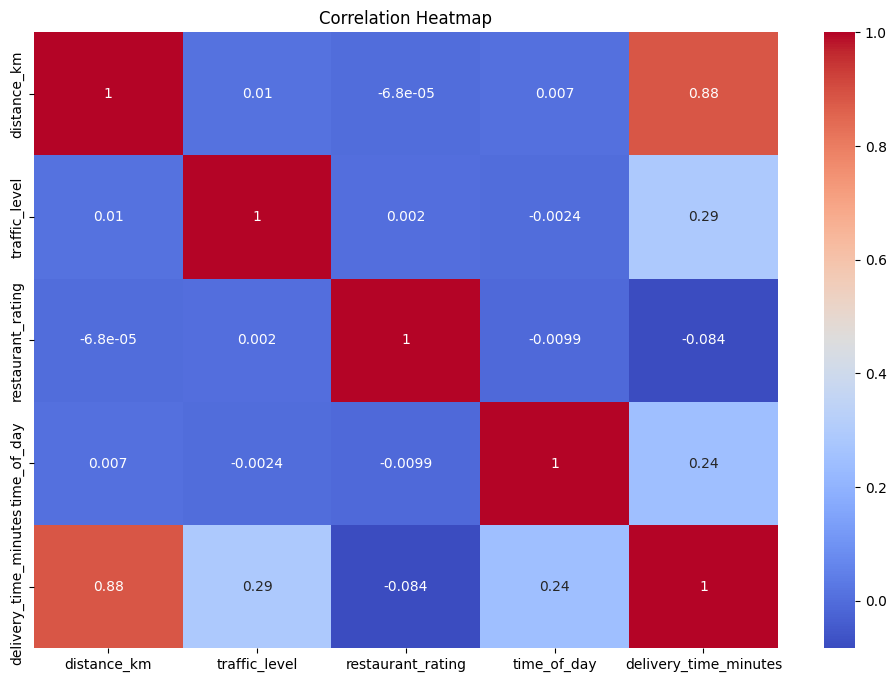

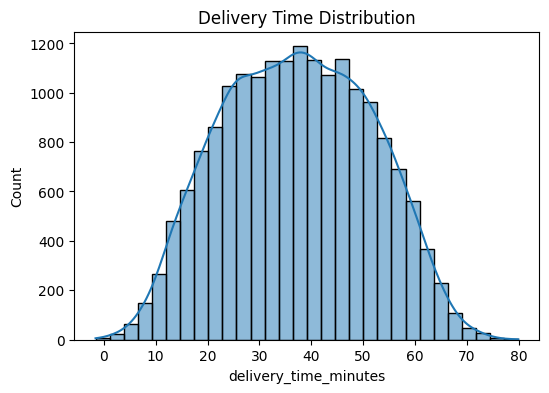

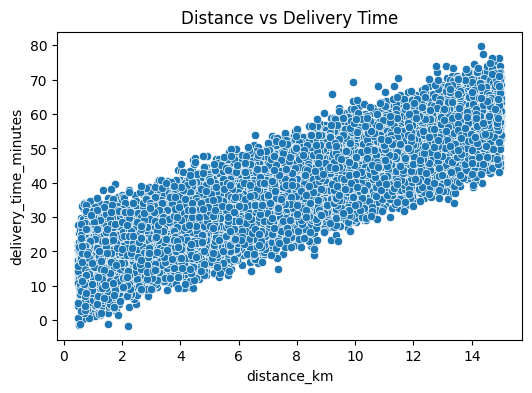

Training samples: (14400, 4)
Testing samples: (3600, 4)

Linear Regression Performance
------------------------------
MAE : 3.2316611537735076
MSE : 16.578917009184615
RMSE: 4.0717216271725425
R2  : 0.9180180447144648

Decision Tree Performance
------------------------------
MAE : 4.651879629629629
MSE : 33.71574228395062
RMSE: 5.80652583598408
R2  : 0.8332772596177312

Random Forest Performance
------------------------------
MAE : 3.6787136111111107
MSE : 21.185396190282432
RMSE: 4.602759627688854
R2  : 0.8952392244791446


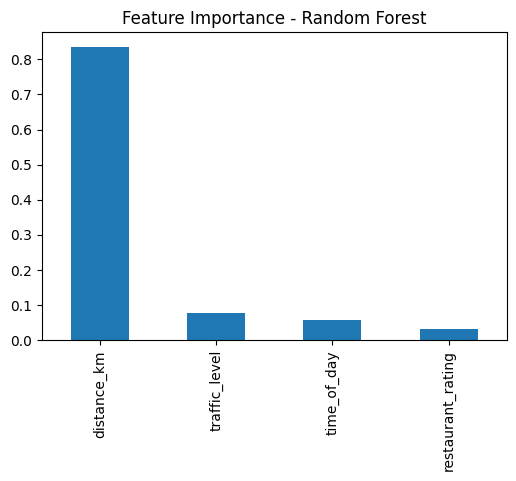


Predicted Delivery Time (minutes): 45.274999999999984

✅ Project Completed Successfully!

• Problem Type      : Regression
• Best Model        : Random Forest
• Evaluation Metric : MAE, RMSE, R2
• Use Case          : Food Delivery Time Prediction



In [1]:
# ============================================================
# 📦 FOOD DELIVERY TIME PREDICTION – COMPLETE ML PROJECT
# ============================================================

# =============================
# 1️⃣ IMPORT LIBRARIES
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =============================
# 2️⃣ LOAD DATASET
# =============================
df = pd.read_csv('/content/food_delivery_time.csv')

print("Dataset Shape:", df.shape)
df.head()

# =============================
# 3️⃣ DATA UNDERSTANDING
# =============================
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
df.describe()

# =============================
# 4️⃣ CHECK MISSING VALUES
# =============================
print("\nMissing Values:")
df.isnull().sum()

# (No missing values found ✔)

# =============================
# 5️⃣ EXPLORATORY DATA ANALYSIS (EDA)
# =============================
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of target variable
plt.figure(figsize=(6,4))
sns.histplot(df['delivery_time_minutes'], bins=30, kde=True)
plt.title("Delivery Time Distribution")
plt.show()

# Distance vs Delivery Time
plt.figure(figsize=(6,4))
sns.scatterplot(x='distance_km', y='delivery_time_minutes', data=df)
plt.title("Distance vs Delivery Time")
plt.show()

# =============================
# 6️⃣ FEATURE SELECTION
# =============================
X = df.drop('delivery_time_minutes', axis=1)
y = df['delivery_time_minutes']

# =============================
# 7️⃣ TRAIN TEST SPLIT
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

# =============================
# 8️⃣ FEATURE SCALING
# =============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================
# 9️⃣ MODEL TRAINING
# =============================

# 🔹 Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# 🔹 Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# 🔹 Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# =============================
# 🔟 MODEL EVALUATION FUNCTION
# =============================
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance")
    print("-" * 30)
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2  :", r2_score(y_true, y_pred))

# Evaluate all models
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)

# =============================
# 1️⃣1️⃣ FEATURE IMPORTANCE (RF)
# =============================
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(6,4))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.show()

# =============================
# 1️⃣2️⃣ FINAL MODEL SELECTION
# =============================
# Random Forest performs best → selected as final model

# =============================
# 1️⃣3️⃣ PREDICTION ON NEW DATA
# =============================
new_order = pd.DataFrame({
    'distance_km': [7.5],
    'traffic_level': [2],
    'restaurant_rating': [4.5],
    'time_of_day': [1]
})

predicted_time = rf.predict(new_order)
print("\nPredicted Delivery Time (minutes):", predicted_time[0])

# =============================
# 1️⃣4️⃣ CONCLUSION
# =============================
print("""
✅ Project Completed Successfully!

• Problem Type      : Regression
• Best Model        : Random Forest
• Evaluation Metric : MAE, RMSE, R2
• Use Case          : Food Delivery Time Prediction
""")
